In [2]:
from sympy import *
from IPython.display import display, Math, Markdown
import pandas as pd
import numpy as np
init_printing()

# Laboratoire 2

## Moment d'inertie théorique

### $I_{i_\text{ (cylindres)}}$ théorique

#### Les équations 
$\star$ Il faut aussi multiplier par deux, car deux cylindres

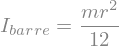

In [3]:
I_barre, I_y, m, r, d = symbols('I_barre I_y m r d')
I_barre_cyl = Eq(I_barre, Rational(1, 12)*m*r**2)
I_y_cyl = Eq(I_y, I_barre + m*d**2)

display(I_barre_cyl)
display(I_y_cyl)

#### Données des montages (cylindres)
- $m = 2.66\>(kg)$ 
- $r = 0.02538\>(m)$
- $d_i = [0.40, 0.15]\>(m)$

In [ ]:
distance_cyl = [0.4, 0.15]
rows = []
i = 2

for d_i in distance_cyl: 
    donnees = {m:2.66, r:0.02538, d:d_i}
    I_barre_val = I_barre_cyl.rhs.subs(donnees)
    I_axe_val = I_y_cyl.rhs.subs({**donnees, d:d_i, I_barre: I_barre_val})
    
    rows.append({
        "Montage": i,
        "$d_i \\mathrm{(m)}$": d_i,
        "$Ī(\\mathrm{kg}\\cdot \\mathrm{m}^2)$": float(2*I_barre_val),
        "$I(\\mathrm{kg}\\cdot \\mathrm{m}^2)$": float(2*I_axe_val)
    })
    i+=1


df_cyl = pd.DataFrame(rows)
Markdown(df_cyl.to_markdown(index=False, floatfmt=".6g"))

|   Montage |   $d_i \mathrm{(m)}$ |   $Ī(\mathrm{kg}\cdot \mathrm{m}^2)$ |   $I(\mathrm{kg}\cdot \mathrm{m}^2)$ |
|----------:|---------------------:|-------------------------------------:|-------------------------------------:|
|         2 |                 0.4  |                          0.000285571 |                             0.851486 |
|         3 |                 0.15 |                          0.000285571 |                             0.119986 |

### $I_{i_\text{ (planches)}}$ mesuré

#### Les équations 

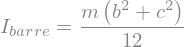

In [5]:
I_barre, I_y, m, b, c, a, d = symbols('I_barre I_y m b c a d')
I_barre_planche = Eq(I_barre, Rational(1, 12)*m*(b**2 + c**2))
I_y_planche = Eq(I_y, I_barre + m*d**2)

display(I_barre_planche)
display(I_y_planche)

#### Données des montages (planches)
- $m = 0.92\>(kg)$ 
- $b = 0.083\>(m)$
- $c = 0.6\>(m)$
- $d_i = [0, 0.19]\>(m)$

In [6]:
distance_planche = [0, 0.19]
rows = []
i = 4

for d_i in distance_planche:
    donnees = {m:0.92, b:0.083, c:0.6, d:d_i}
    I_barre_val = I_barre_planche.rhs.subs(donnees)
    I_axe_val = I_y_planche.rhs.subs({**donnees, d: d_i, I_barre: I_barre_val})

    rows.append({
        "Montage": i,
        "$d_i \\mathrm{(m)}$": d_i,
        "$Ī(\\mathrm{kg}\\cdot \\mathrm{m}^2)$": float(I_barre_val),
        "$I(\\mathrm{kg}\\cdot \\mathrm{m}^2)$": float(I_axe_val)
    })
    i+=1
df_planche = pd.DataFrame(rows)
Markdown(df_planche.to_markdown(index=False, floatfmt=".4g"))


|   Montage |   $d_i \mathrm{(m)}$ |   $Ī(\mathrm{kg}\cdot \mathrm{m}^2)$ |   $I(\mathrm{kg}\cdot \mathrm{m}^2)$ |
|----------:|---------------------:|-------------------------------------:|-------------------------------------:|
|         4 |                 0    |                              0.02813 |                              0.02813 |
|         5 |                 0.19 |                              0.02813 |                              0.06134 |

## Moment d'inertie mesuré

### $I_i$ mesuré

#### Les inconnus

On a quatre inconnus : 
- $T$ (Tension de la corde)
- $a$ (accélération du bloc)
- $\alpha$ (accélérationa angulaire du bloc)
- $I$ (Inertie)

#### Les équations 

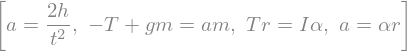

In [7]:
m, g, T, a, h, t, r, I, alpha = symbols('m g T a h t r I alpha')

inconnus = (a, T, alpha, I)
inconnus_unit_dict = {T: r"\mathrm{N}", a: r"\mathrm{m/s}^2", alpha: r"\mathrm{rad/s}^2", I: r"\mathrm{kg}\cdot \mathrm{m}^2"}

eq_accel_bloc = Eq(a, 2*h/t**2)
eq_newton_2_bloc = Eq(m*g - T, m*a)
eq_moment_rota = Eq(T*r, I*alpha)
eq_accel_angul = Eq(a, alpha*r)

systeme = [eq_accel_bloc, eq_newton_2_bloc, eq_moment_rota, eq_accel_angul]
systeme

#### Données des montages
La seule données qui change içi est $t$ (temps)

- $h = 0.95\>(m)$ 
- $r = 0.02376\>(m)$
- $m = 1\>(kg)$
- $t_i = [4.13, 16.15, 6.52, 4.99, 6.51]\>(s)$
- $g = 9.81\>(m/s^2)$

On résout pour les inconnus tel que les données des montages

In [8]:
temps_montage_i = [4.13, 16.15, 6.52, 4.99, 6.51]
rows = []

for i, t_i in enumerate(temps_montage_i):
    donnees = {h:0.95, r:0.02376, m:1, t:t_i, g:9.81}
    systeme_montage = [eq.subs(donnees) for eq in systeme]
    sol = solve(systeme_montage, inconnus, dict=True)[0]

    row = {"Montage": i+1, "$t$ (s)": t_i}
    for inc in inconnus: 
        row[f"${latex(inc)}({inconnus_unit_dict[inc]})$"] = float(sol[inc])
    rows.append(row)
df_mesure = pd.DataFrame(rows)
Markdown(df_mesure.to_markdown(index=False, floatfmt=".6g"))


|   Montage |   $t$ (s) |   $a(\mathrm{m/s}^2)$ |   $T(\mathrm{N})$ |   $\alpha(\mathrm{rad/s}^2)$ |   $I(\mathrm{kg}\cdot \mathrm{m}^2)$ |
|----------:|----------:|----------------------:|------------------:|-----------------------------:|-------------------------------------:|
|         1 |      4.13 |            0.111392   |           9.69861 |                     4.68821  |                            0.0491529 |
|         2 |     16.15 |            0.00728465 |           9.80272 |                     0.306593 |                            0.75968   |
|         3 |      6.52 |            0.0446949  |           9.76531 |                     1.8811   |                            0.123345  |
|         4 |      4.99 |            0.0763049  |           9.7337  |                     3.21149  |                            0.0720142 |
|         5 |      6.51 |            0.0448324  |           9.76517 |                     1.88688  |                            0.122965  |

## Résultats

Pour trouver $I_{(cylindres)}$ et $I_{(planches)}$, il suffit de soustraire le $I_{mesure}$ du montage #1.

$I_{i_{(objet)}}$ = $I_{i_\text{mesure}} - I_{1_\text{mesure}}$

In [9]:
res_col = r"$I(\mathrm{kg}\cdot \mathrm{m}^2)$"
theo_col = "$I_{\\text{theorique}}$"
mesure_col = "$I_{\\text{mesure}}$"

df_theorique = pd.concat([df_cyl, df_planche], ignore_index=True).rename(columns={res_col: theo_col})

df_results = df_mesure[["Montage", res_col]].merge(
    df_theorique[["Montage", theo_col]],
    on="Montage",
    how="left"
)

df_results['$I_{(objet)}$'] = df_results[res_col] - df_results[res_col][0]

df_results = df_results.rename(columns={res_col: mesure_col}).replace([np.nan, 0], None)

Markdown(df_results.to_markdown(index=False, floatfmt=".6g"))

|   Montage |   $I_{\text{mesure}}$ |   $I_{\text{theorique}}$ |   $I_{(objet)}$ |
|----------:|----------------------:|-------------------------:|----------------:|
|         1 |             0.0491529 |                          |                 |
|         2 |             0.75968   |                0.851486  |       0.710527  |
|         3 |             0.123345  |                0.119986  |       0.0741918 |
|         4 |             0.0720142 |                0.0281282 |       0.0228613 |
|         5 |             0.122965  |                0.0613402 |       0.073812  |